In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['Brown-Headed Barbet','Buffalo','butterfly','cat','Cattle Egret','chicken','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','deer','dog','elephant','Forest Wagtail','fox','gharial','Gray Wagtail','Green Bee-Eater','Hoopoe','horse','House Crow','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','Jungle Babbler','kangaroo','leopard','lion','Northern Lapwing','pangolin','Peacock','Python','Red-Wattled Lapwing','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','Sarus Crane','shark','sheep','spider','tiger','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:01<00:00, 691.88it/s]


Loading test_set


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 97.87it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='sigmoid', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=1000)

Epoch 1/1000
456/456 [==============================] - 17s 21ms/step - loss: 3.6453 - accuracy: 0.0935
Epoch 2/1000
456/456 [==============================] - 10s 21ms/step - loss: 3.4349 - accuracy: 0.1316
Epoch 3/1000
456/456 [==============================] - 10s 21ms/step - loss: 3.1686 - accuracy: 0.1947
Epoch 4/1000
456/456 [==============================] - 9s 21ms/step - loss: 3.0630 - accuracy: 0.2188
Epoch 5/1000
456/456 [==============================] - 10s 21ms/step - loss: 3.0011 - accuracy: 0.2340
Epoch 6/1000
456/456 [==============================] - 10s 21ms/step - loss: 2.9472 - accuracy: 0.2466
Epoch 7/1000
456/456 [==============================] - 10s 21ms/step - loss: 2.9138 - accuracy: 0.2553
Epoch 8/1000
456/456 [==============================] - 10s 21ms/step - loss: 2.8765 - accuracy: 0.2618
Epoch 9/1000
456/456 [==============================] - 10s 21ms/step - loss: 2.8419 - accuracy: 0.2709
Epoch 10/1000
456/456 [==============================] - 10s 21ms

456/456 [==============================] - 10s 21ms/step - loss: 1.3868 - accuracy: 0.6137
Epoch 80/1000
456/456 [==============================] - 9s 21ms/step - loss: 1.3748 - accuracy: 0.6168
Epoch 81/1000
456/456 [==============================] - 10s 21ms/step - loss: 1.3612 - accuracy: 0.6210
Epoch 82/1000
456/456 [==============================] - 10s 21ms/step - loss: 1.3518 - accuracy: 0.6240
Epoch 83/1000
456/456 [==============================] - 10s 21ms/step - loss: 1.3403 - accuracy: 0.6267
Epoch 84/1000
456/456 [==============================] - 10s 21ms/step - loss: 1.3238 - accuracy: 0.6300
Epoch 85/1000
456/456 [==============================] - 10s 21ms/step - loss: 1.3121 - accuracy: 0.6346
Epoch 86/1000
456/456 [==============================] - 10s 21ms/step - loss: 1.3067 - accuracy: 0.6380
Epoch 87/1000
456/456 [==============================] - 10s 21ms/step - loss: 1.2893 - accuracy: 0.6387
Epoch 88/1000
456/456 [==============================] - 10s 21ms/step

456/456 [==============================] - 10s 21ms/step - loss: 0.7602 - accuracy: 0.7881
Epoch 157/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.7492 - accuracy: 0.7911
Epoch 158/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.7542 - accuracy: 0.7880
Epoch 159/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.7496 - accuracy: 0.7898
Epoch 160/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.7413 - accuracy: 0.7940
Epoch 161/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.7280 - accuracy: 0.7965
Epoch 162/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.7338 - accuracy: 0.7949
Epoch 163/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.7246 - accuracy: 0.7974
Epoch 164/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.7199 - accuracy: 0.7992
Epoch 165/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.5122 - accuracy: 0.8579
Epoch 234/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.5057 - accuracy: 0.8598
Epoch 235/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.5105 - accuracy: 0.8604
Epoch 236/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.5132 - accuracy: 0.8601
Epoch 237/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.5013 - accuracy: 0.8623
Epoch 238/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.4908 - accuracy: 0.8634
Epoch 239/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.4893 - accuracy: 0.8659
Epoch 240/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.4931 - accuracy: 0.8645
Epoch 241/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.4952 - accuracy: 0.8642
Epoch 242/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.3838 - accuracy: 0.8950
Epoch 311/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.4000 - accuracy: 0.8929
Epoch 312/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.4060 - accuracy: 0.8919
Epoch 313/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3952 - accuracy: 0.8926
Epoch 314/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3919 - accuracy: 0.8960
Epoch 315/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3862 - accuracy: 0.8964
Epoch 316/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3948 - accuracy: 0.8942
Epoch 317/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3815 - accuracy: 0.8978
Epoch 318/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3857 - accuracy: 0.8954
Epoch 319/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.3169 - accuracy: 0.9155
Epoch 388/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3259 - accuracy: 0.9149
Epoch 389/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3294 - accuracy: 0.9141
Epoch 390/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3341 - accuracy: 0.9121
Epoch 391/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3358 - accuracy: 0.9132
Epoch 392/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3230 - accuracy: 0.9154
Epoch 393/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3330 - accuracy: 0.9133
Epoch 394/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3248 - accuracy: 0.9150
Epoch 395/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.3337 - accuracy: 0.9139
Epoch 396/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.2953 - accuracy: 0.9260
Epoch 465/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2908 - accuracy: 0.9257
Epoch 466/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2961 - accuracy: 0.9248
Epoch 467/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2930 - accuracy: 0.9260
Epoch 468/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2812 - accuracy: 0.9276
Epoch 469/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2945 - accuracy: 0.9253
Epoch 470/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2843 - accuracy: 0.9284
Epoch 471/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2872 - accuracy: 0.9273
Epoch 472/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2976 - accuracy: 0.9244
Epoch 473/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.2606 - accuracy: 0.9351
Epoch 542/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2654 - accuracy: 0.9338
Epoch 543/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2633 - accuracy: 0.9342
Epoch 544/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2633 - accuracy: 0.9351
Epoch 545/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2555 - accuracy: 0.9372
Epoch 546/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2696 - accuracy: 0.9333
Epoch 547/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2577 - accuracy: 0.9354
Epoch 548/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2467 - accuracy: 0.9391
Epoch 549/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2626 - accuracy: 0.9350
Epoch 550/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.2412 - accuracy: 0.9419
Epoch 619/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2375 - accuracy: 0.9435
Epoch 620/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2382 - accuracy: 0.9422
Epoch 621/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2389 - accuracy: 0.9425
Epoch 622/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2347 - accuracy: 0.9424
Epoch 623/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2431 - accuracy: 0.9408
Epoch 624/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2445 - accuracy: 0.9408
Epoch 625/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2448 - accuracy: 0.9417
Epoch 626/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2326 - accuracy: 0.9427
Epoch 627/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.2195 - accuracy: 0.9479
Epoch 696/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2215 - accuracy: 0.9483
Epoch 697/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2291 - accuracy: 0.9461
Epoch 698/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2136 - accuracy: 0.9488
Epoch 699/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2270 - accuracy: 0.9467
Epoch 700/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2268 - accuracy: 0.9468
Epoch 701/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2192 - accuracy: 0.9480
Epoch 702/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2194 - accuracy: 0.9479
Epoch 703/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2296 - accuracy: 0.9465
Epoch 704/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.2104 - accuracy: 0.9510
Epoch 773/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2073 - accuracy: 0.9514
Epoch 774/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2038 - accuracy: 0.9526
Epoch 775/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2027 - accuracy: 0.9523
Epoch 776/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2083 - accuracy: 0.9516
Epoch 777/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1969 - accuracy: 0.9528
Epoch 778/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2159 - accuracy: 0.9514
Epoch 779/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2210 - accuracy: 0.9489
Epoch 780/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2142 - accuracy: 0.9502
Epoch 781/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.2047 - accuracy: 0.9540
Epoch 850/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2034 - accuracy: 0.9528
Epoch 851/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1994 - accuracy: 0.9551
Epoch 852/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2033 - accuracy: 0.9547
Epoch 853/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2084 - accuracy: 0.9541
Epoch 854/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2099 - accuracy: 0.9530
Epoch 855/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1952 - accuracy: 0.9558
Epoch 856/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2096 - accuracy: 0.9550
Epoch 857/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2065 - accuracy: 0.9540
Epoch 858/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 21ms/step - loss: 0.2062 - accuracy: 0.9558
Epoch 927/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2003 - accuracy: 0.9566
Epoch 928/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1915 - accuracy: 0.9563
Epoch 929/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1889 - accuracy: 0.9588
Epoch 930/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.2170 - accuracy: 0.9541
Epoch 931/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1909 - accuracy: 0.9573
Epoch 932/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1810 - accuracy: 0.9589
Epoch 933/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1951 - accuracy: 0.9580
Epoch 934/1000
456/456 [==============================] - 10s 21ms/step - loss: 0.1792 - accuracy: 0.9587
Epoch 935/1000
456/456 [==============================] - 10s

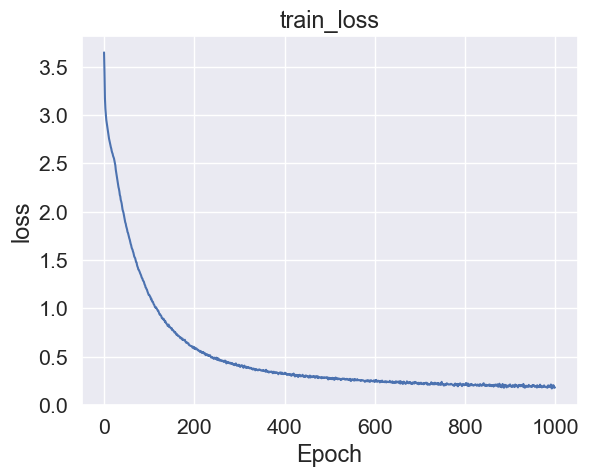

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [10]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

19/19 [==============================] - 1s 7ms/step


In [11]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.40241796200345425


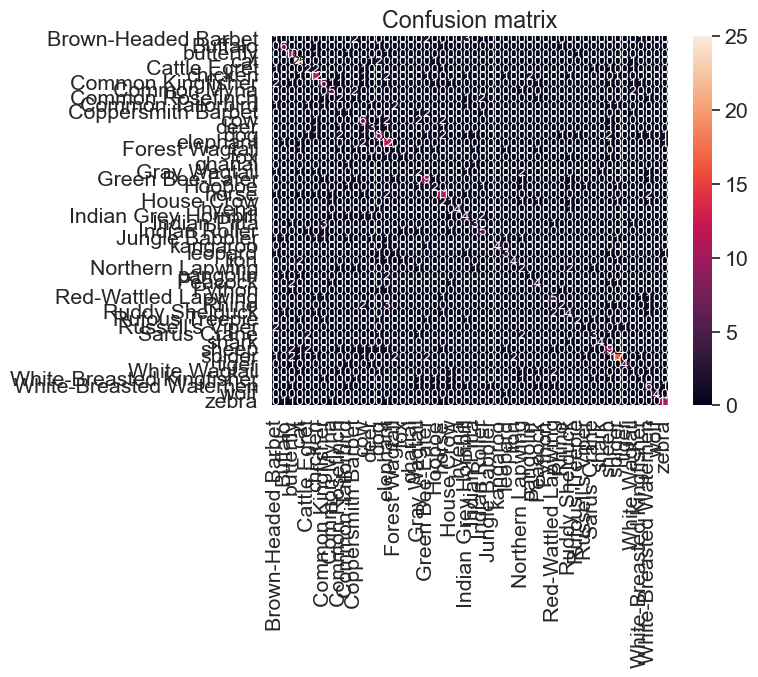

In [12]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [13]:
'存模型&讀模型'
from keras.models import load_model
model.save("problem_retry_02_model")

INFO:tensorflow:Assets written to: problem_retry_02_model\assets


INFO:tensorflow:Assets written to: problem_retry_02_model\assets
